# Deterministic Chaos and Poincare Section

## Van der Pol equation:

$$ \frac{d^2x}{dt^2} + cx(1 - x^2) \frac{dx}{dt} + \alpha x + \beta x^3 = F \cos{\omega t} $$

which can be rewritten as system of ODEs:

$$ \frac{dx}{dt} = v $$
$$  \frac{dv}{dt} = -cx(1 - x^2)v - \alpha x - \beta x^3 + F \cos{\omega t} $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

In [2]:
t, c, alpha, beta, F, omega = sp.symbols('t c alpha beta F omega')
x = sp.Function('x')(t)
v = sp.Function('v')(t)

diff_eq1 = sp.Eq(x.diff(t), v)
diff_eq1

Eq(Derivative(x(t), t), v(t))

In [3]:
diff_eq2 = sp.Eq(v.diff(t), -c * x * (1 - x**2) * v - alpha * x - beta * x**2 + F * sp.cos(omega * t))
diff_eq2

Eq(Derivative(v(t), t), F*cos(omega*t) - alpha*x(t) - beta*x(t)**2 - c*(1 - x(t)**2)*v(t)*x(t))

In [4]:
ics = {x.subs(t, 0): 0, x.diff(t).subs(t, 0): -1}
ics

{x(0): 0, Subs(Derivative(x(t), t), t, 0): -1}

We put $c = 0.1$, $\beta = 1$, $F = 6$ and $\omega = 1$. We will study the system for various $\alpha$

In [5]:
c_val, beta_val, F_val, omega_val = sp.Rational(1, 10), 1, 6, 1
x_eq = copy(diff_eq1)
v_eq = diff_eq2.subs([(c, c_val), (beta, beta_val), (F, F_val), (omega, omega_val)])
v_eq

Eq(Derivative(v(t), t), -alpha*x(t) - (1 - x(t)**2)*v(t)*x(t)/10 - x(t)**2 + 6*cos(t))

### $\alpha = 50$

In [6]:
alpha_val = 50
v_eq_alpha = v_eq.subs(alpha, alpha_val)
v_eq_alpha

Eq(Derivative(v(t), t), -(1 - x(t)**2)*v(t)*x(t)/10 - x(t)**2 - 50*x(t) + 6*cos(t))

In [7]:
t_a, t_b = 0, 50
quality = 4000
init_x = [0]
init_v = [-1]
trajectories = calculate_numerically_list_of_trajectories(
    [x_eq.rhs, v_eq_alpha.rhs], [x, v], t, (t_a, t_b), 0, [(None, None), (None, None)], 
    zip(init_x, init_v), quality, with_t_array=True
)

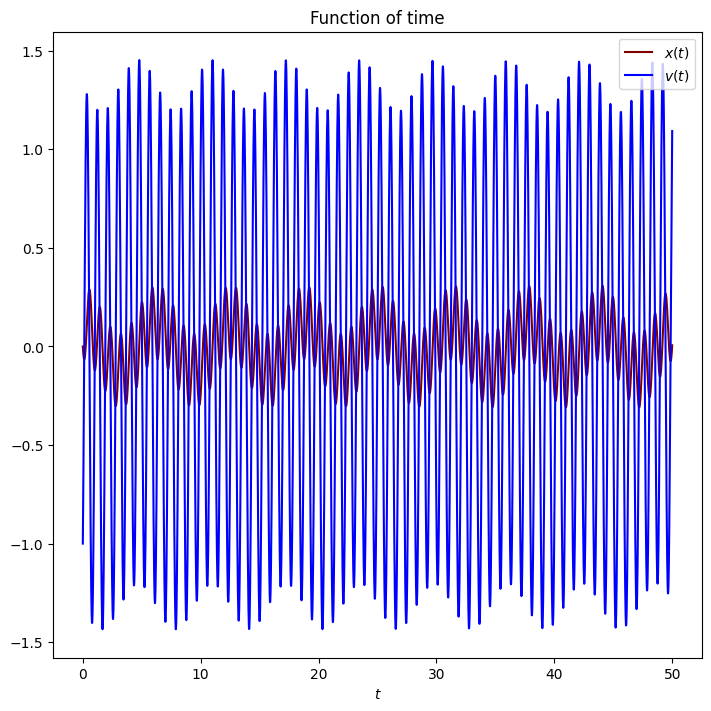

In [8]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
for trajectory in trajectories:
    axes.plot(trajectory[0], trajectory[1], color='maroon', label='$x(t)$')
    axes.plot(trajectory[0], trajectory[2], color='blue', label='$v(t)$')
axes.legend(loc='upper right')
_=axes.set(title=f'Function of time', xlabel=f'${t}$')

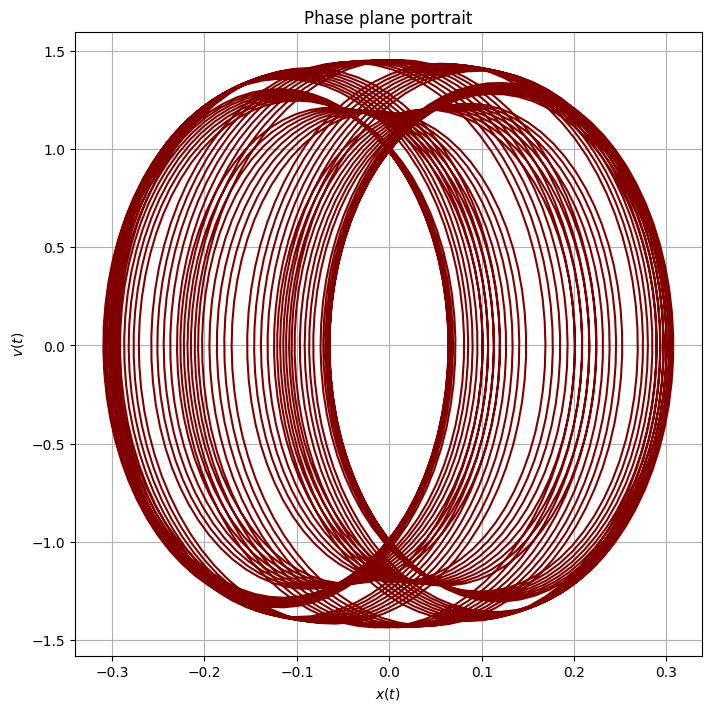

In [9]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
for trajectory in trajectories:
    axes.plot(trajectory[1], trajectory[2], color='maroon')
axes.grid()
_=axes.set(title='Phase plane portrait', xlabel=f'${x}$', ylabel=f'${v}$')

## Poincare Section

We define $T = \frac{2 \pi n}{\omega}$ which is going to be a snapshot of phase trajectory for $n = 0, 1, 2 ...$.

In [10]:
n = sp.symbols('n')
T = sp.Function('T')(n)
T_eq = sp.Eq(T, (2 * sp.pi * n) / omega)
T_eq

Eq(T(n), 2*pi*n/omega)

In [11]:
omega_val = 1
T_eq_omega = T_eq.subs(omega, omega_val)
n_values = np.arange(1, 11)
T_values = evaluate_function(T_eq_omega.rhs, n, n_values)
print(T_values)

[ 6.28318531 12.56637061 18.84955592 25.13274123 31.41592654 37.69911184
 43.98229715 50.26548246 56.54866776 62.83185307]


In [12]:
n_a, n_b = 1, 300
n_values = np.arange(n_a, n_b + 1)
T_values = evaluate_function(T_eq_omega.rhs, n, n_values)
init_x = [0]
init_v = [-1]
poincare_sections = calculate_numerically_list_of_trajectories(
    [x_eq.rhs, v_eq_alpha.rhs], [x, v], t, (-1, -1), 0, [(None, None), (None, None)], 
    zip(init_x, init_v), quality, with_t_array=True, t_eval=T_values
)

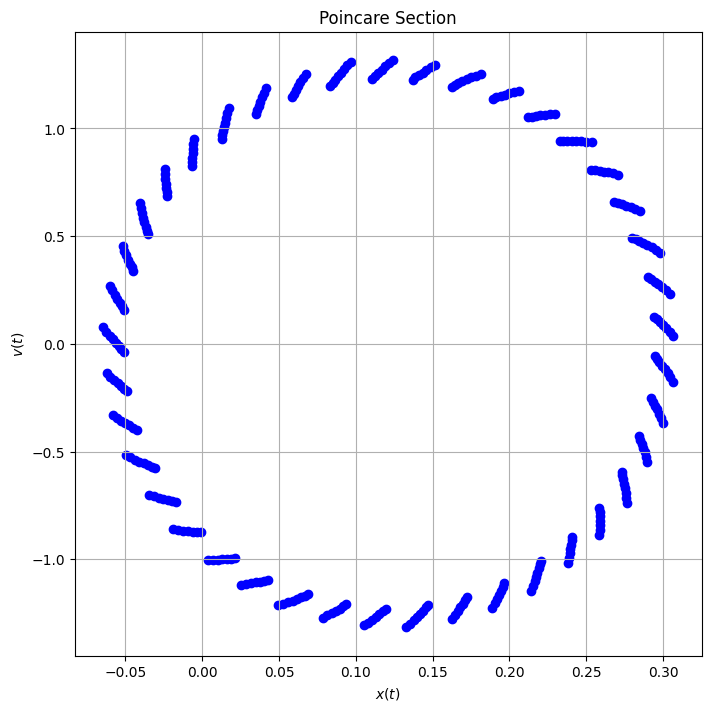

In [13]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
for poincare_section in poincare_sections:
    axes.scatter(poincare_section[1], poincare_section[2], color='blue')
axes.grid()
_=axes.set(title='Poincare Section', xlabel=f'${x}$', ylabel=f'${v}$')

Let's now encapsulate all code in one function:

In [14]:
def show_three_graphs(alpha_value, n_end, t_end):
    v_eq_alpha = v_eq.subs(alpha, alpha_value)
    t_a, t_b = 0, t_end
    quality = 4000
    init_x = [0]
    init_v = [-1]
    trajectories = calculate_numerically_list_of_trajectories(
        [x_eq.rhs, v_eq_alpha.rhs], [x, v], t, (t_a, t_b), 0, [(None, None), (None, None)], 
        zip(init_x, init_v), quality, with_t_array=True
    )
    omega_val = 1
    T_eq_omega = T_eq.subs(omega, omega_val)
    n_a, n_b = 1, n_end
    n_values = np.arange(n_a, n_b + 1)
    T_values = evaluate_function(T_eq_omega.rhs, n, n_values)
    poincare_sections = calculate_numerically_list_of_trajectories(
        [x_eq.rhs, v_eq_alpha.rhs], [x, v], t, (-1, -1), 0, [(None, None), (None, None)], 
        zip(init_x, init_v), quality, with_t_array=True, t_eval=T_values
    )
    figure, axes = plt.subplots(1, 3, layout='constrained', figsize=(16, 6))
    for trajectory in trajectories:
        axes[0].plot(trajectory[0], trajectory[1], color='maroon', label='$x(t)$')
        axes[0].plot(trajectory[0], trajectory[2], color='blue', label='$v(t)$')
        axes[1].plot(trajectory[1], trajectory[2], color='maroon')
    axes[0].legend(loc='upper right')
    axes[0].set(title=f'Function of time', xlabel=f'${t}$')
    axes[1].set(title='Phase plane portrait', xlabel=f'${x}$', ylabel=f'${v}$')
    for poincare_section in poincare_sections:
        axes[2].scatter(poincare_section[1], poincare_section[2], color='blue')
    axes[2].set(title='Poincare Section', xlabel=f'${x}$', ylabel=f'${v}$')
    figure.suptitle(f'Plots for $\\{alpha} = {alpha_value}$')

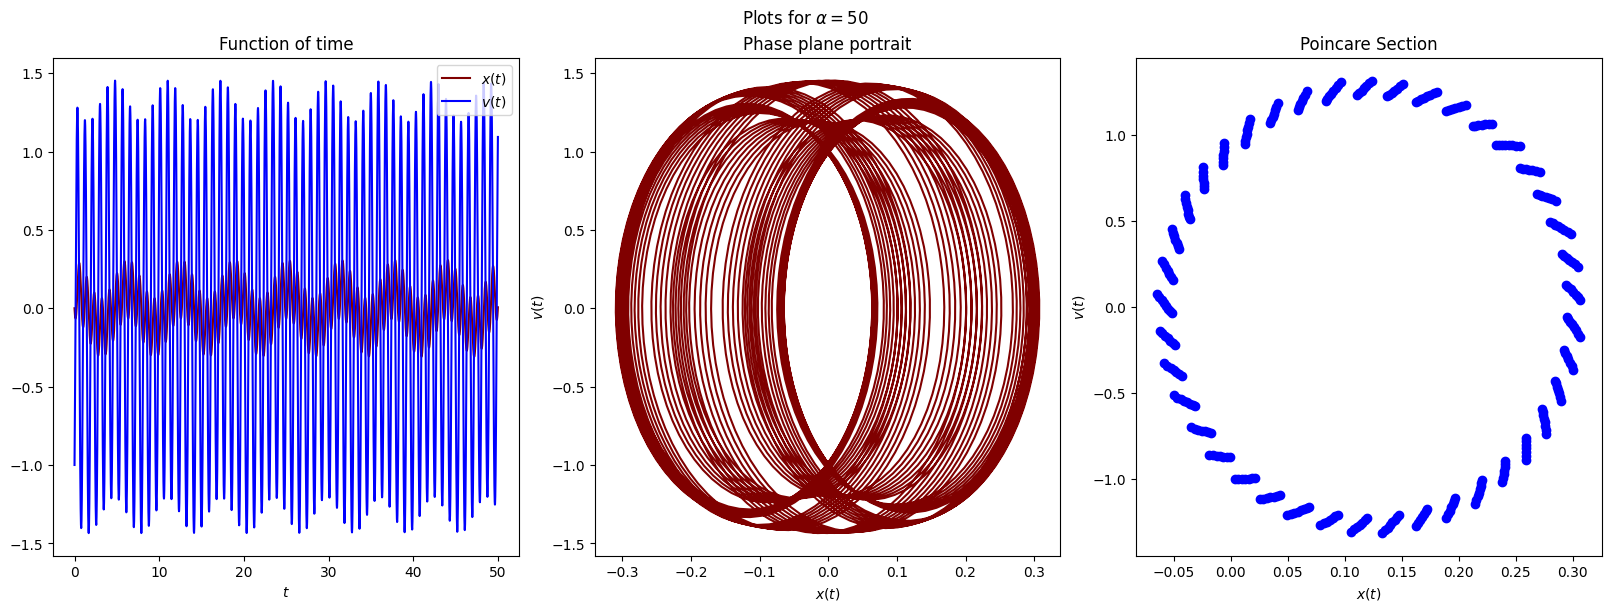

In [15]:
show_three_graphs(50, 300, 50)

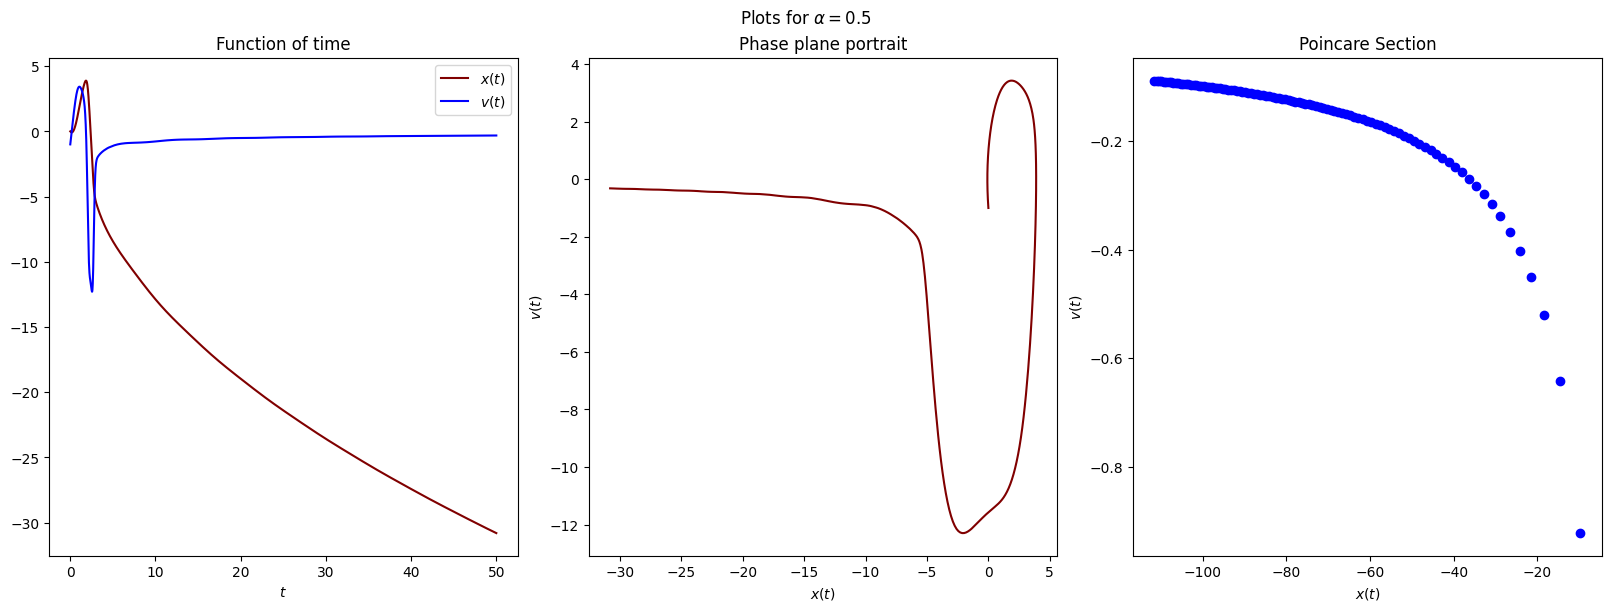

In [21]:
show_three_graphs(0.5, 100, 50)